In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Data preprocessing
firstly we will explore the data and taje in considerations columns we nedd and drop others we don't

In [18]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


### it appears that the unamed is indexing so we will drop it 

In [19]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [21]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


### from describe there are some unusual beahviours observed as :
- the min in the diff coulmn is -ve value
- symptom 6 has its percentiles and max equal to each other
- gender have a max of 2

### fristly we explore the diff as it's descrioed in the project statement that it's the time the symptoms appeared so it can't be less than 0

In [22]:
print(df[df['diff_sym_hos'] <0])

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
223        56       18       1  35.0          0           0         6   
240       128       18       1  65.0          0           0         6   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
223        31        19        12         3         1            -1       0  
240        31        19        12         3         1            -5       0  


#### they're only 2 indicies so we would drop it

In [23]:
print(df.shape)
df.drop([223,240],axis=0,inplace=True)
df.reset_index(inplace=True, drop=True)
print(df.iloc[222:241,:])
print(df.shape)

(863, 14)
     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
222        44       18       1  55.0          0           0         6   
223       128       18       1  55.0          0           0         6   
224       128       18       0  55.0          0           0         6   
225       128       18       1  65.0          0           0         6   
226         1       18       0  65.0          0           0        14   
227       117       18       0  65.0          0           0        14   
228       117       18       1  45.0          0           0        14   
229       117       18       1  65.0          0           0         4   
230       117       18       1  35.0          0           0         6   
231         1       18       1  65.0          0           0         6   
232        80       18       1  65.0          0           0         6   
233         1       18       1  65.0          0           0         6   
234       128       18       0  85.0     

### next we explore the values of sympotom 6 and the gender

In [24]:
print(df['symptom6'].value_counts())

symptom6
1    860
0      1
Name: count, dtype: int64


#### as can be seen there's only 1 zero so the symptom doesn't effect any model so we will drop it

In [25]:
gender = df['gender'].value_counts()
print(gender)

gender
1    387
0    302
2    172
Name: count, dtype: int64


#### an undefined variable 2  exists with big frequency so that makes it redundant to make sure we will pie plot the percentages

([<matplotlib.patches.Wedge at 0x2772db5fd00>,
 [Text(-0.1738616087430874, -1.0861731634528935, '1'),
  Text(0.7785266649483672, 0.777107606425502, '0'),
  Text(-0.8903902960289161, 0.6459141744361548, '2')],
 [Text(-0.09483360476895675, -0.5924580891561236, '44.95%'),
  Text(0.4246509081536548, 0.42387687623209197, '35.08%'),
  Text(-0.4856674341975905, 0.3523168224197208, '19.98%')])

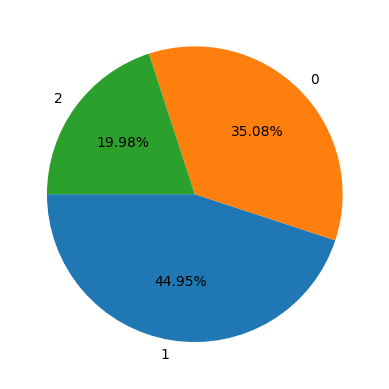

In [26]:
labels=[1,0,2] # as one appeared before 0 in the data
plt.pie(gender,labels=labels,startangle=180,autopct="%2.2f%%")

## now it's obvious what we have to drop and keep before building our models

### dropping gender and symptom6 then splitting the results from the feautres

In [27]:
X = df.drop(columns=['gender' ,'result','symptom6'],axis = 1).values
y = df['result'].values
print(X[:5],y[:5])


[[104.   8.  66.   1.   0.  14.  31.  19.  12.   3.   8.]
 [101.   8.  56.   0.   1.  14.  31.  19.  12.   3.   0.]
 [137.   8.  46.   0.   1.  14.  31.  19.  12.   3.  13.]
 [116.   8.  60.   1.   0.  14.  31.  19.  12.   3.   0.]
 [116.   8.  58.   0.   0.  14.  31.  19.  12.   3.   0.]] [1 0 0 0 0]


## splitting into train , validate and test

In [28]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train[:5]

array([[114. ,  29. ,   6. ,   0. ,   1. ,  14. ,  31. ,  19. ,  12. ,
          3. ,   0. ],
       [ 45. ,  13. ,  25. ,   0. ,   0. ,  14. ,  31. ,  19. ,  12. ,
          3. ,   0. ],
       [ 22. ,  18. ,  65. ,   0. ,   0. ,   6. ,  31. ,  19. ,  12. ,
          3. ,   2. ],
       [ 12. ,  12. ,  49.4,   0. ,   0. ,  14. ,  31. ,  19. ,  12. ,
          3. ,   0. ],
       [108. ,  24. ,  51. ,   0. ,   0. ,  14. ,  31. ,  19. ,  12. ,
          3. ,   0. ]])

### feautre scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
###TODO return after testing the data without using it #############

# importing metrics and validations to be used as required

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True,random_state=42)
accuracy = []
percision = []
recall = []
f1 = []

# 2/ logistic regression

In [57]:
#TODO return after studying
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression()
classifierLR.fit(X_train,y_train)

LogisticRegression()

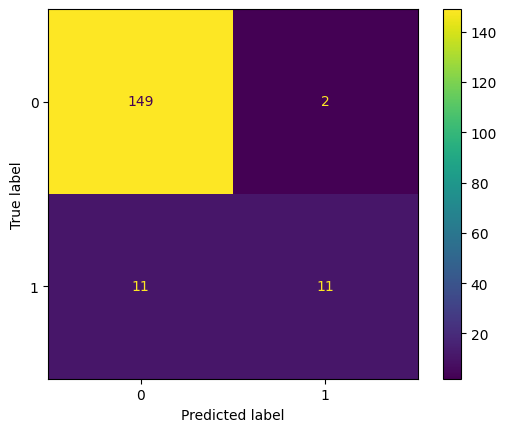

accuracy score :0.925 
recall score :0.500     percesion score : 0.846
f1 score :0.629 


In [59]:
y_LR = classifierLR.predict(X_test)
cm=confusion_matrix(y_pred=y_LR,y_true=y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()
accuracy +=[accuracy_score(y_pred=y_LR,y_true=y_test)]
percision += [precision_score(y_true=y_test,y_pred=y_LR)]
recall += [recall_score(y_true=y_test,y_pred=y_LR)]
f1 += [f1_score(y_true=y_test,y_pred=y_LR)]
print(f"accuracy score :{accuracy[-1]:0.3f} ")
print(f"recall score :{recall[-1]:0.3f}     percesion score : {percision[-1]:0.3f}")
print(f"f1 score :{f1[-1]:0.3f} ")


# 3/ Naive Bayes